### Project: 'MODELO PREDICTIVO DE CLASIFICACIÓN DE CHURN BASADO EN PATRONES DE CONTACTO PARA UNA STARTUP BOLIVIANA'  
#### Author: Flavia Davila Perez
##### Stage: MODELADO
Description: Implementacion de algoritmos de ML para la prediccion de 'Churn Comercial'

### Sección 1: Importacion de Librerias

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


### Sección 2:  Carga de Datos

In [2]:
# import CSV to DataFrame
df = pd.read_csv(r'..\data\output_gold\contact_metrics_clean.csv')

### Sección 3: Selección de Variables

In [3]:
num_columns_com = [
    'Total_Actividades_com', 
    'Total_Llamadas_com', 
    'Llamadas_Efectivas_com',
    'Llamadas_No_Efectivas_com', 
    'WA_Seguimiento_com', 
    'Reuniones_Hechas', 
    'Reuniones_Canceladas',
]

num_columns_exp = [
    'Total_Actividades_exp', 
    'Total_Llamadas_exp',
    'Llamadas_Efectivas_exp',
    'Llamadas_No_Efectivas_exp', 
    'WA_Seguimiento_exp', 
    'Kickoff_Hechas',
    'Kickoff_Canceladas',
    'Capacitaciones_Hechas', 
    'Capacitaciones_Canceladas'
]

cat_columns = [
    'Tipo de cliente',
    'Tipo Primer Contacto',
    'Rango de Contacto',
    'Tipo Primera Capacitación',
    'Onboarding',
    '(C) (EXP) Plazo y Pago',
    'R1yR2'
    ]

label = ['Churn Comercial']

In [4]:
subset_cols= num_columns_com + num_columns_exp + label
df_subset = df[subset_cols]

#### ANALISIS DE CORRELACION LINEAL 

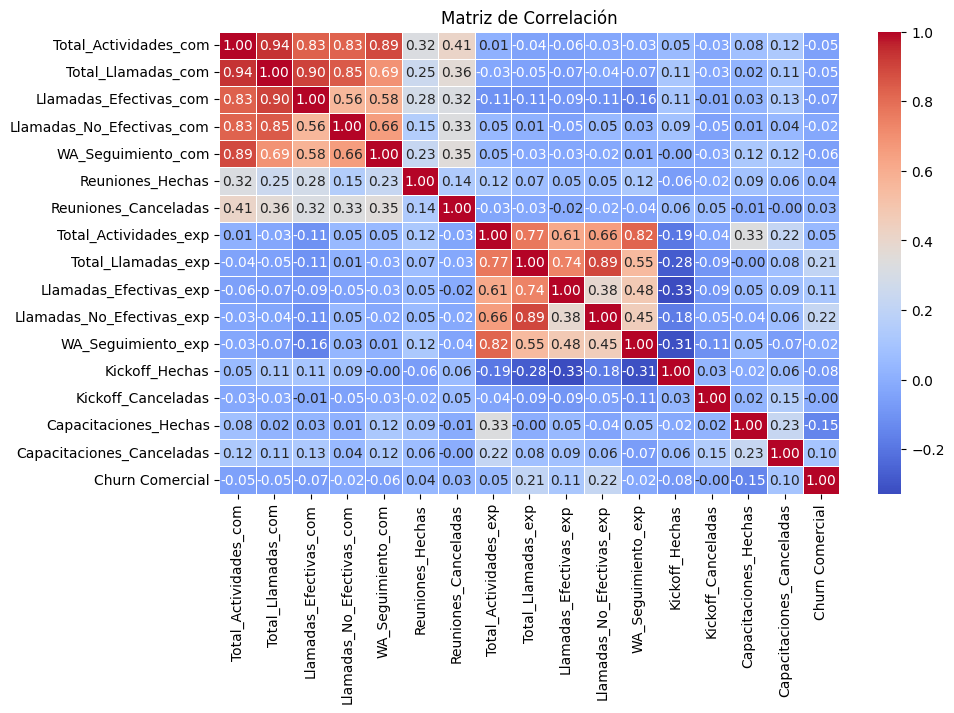

In [5]:
corr_matrix = df_subset.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

#### PRUEBA CHI CUADRADO ENTRE CUALITATIVAS

In [6]:
# Lista de variables cualitativas a comparar con 'Churn Comercial'
categorical_vars = [
    'Tipo de cliente', 
    'Tipo Primer Contacto', 
    'Rango de Contacto', 
    'Tipo Primera Capacitación', 
    'Onboarding',
    '(C) (EXP) Plazo y Pago',
    'R1yR2', 
    'New Categories'
]

# Variable de etiqueta (Churn Comercial)
target_var = 'Churn Comercial'

# Comparar cada variable cualitativa con 'Churn Comercial'
for cat_var in categorical_vars:
    # Crear la tabla de contingencia
    table = pd.crosstab(df[cat_var], df[target_var])

    # Aplicar la prueba Chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(table)

    # Mostrar siempre los resultados
    print(f"🔍 Análisis de {cat_var} vs 'Churn Comercial'")
    print(f"   📌 Estadístico Chi-cuadrado: {chi2:.4f}")
    print(f"   📌 P-valor: {p}")
    print(f"   📌 Grados de libertad: {dof}")

    # Interpretación de significancia
    if p < 0.05:
        print(f"   ✅ Relación significativa (p < 0.05) entre {cat_var} y 'Churn Comercial'\n")
    else:
        print(f"   ❌ No hay relación significativa (p ≥ 0.05) entre {cat_var} y 'Churn Comercial'\n")

🔍 Análisis de Tipo de cliente vs 'Churn Comercial'
   📌 Estadístico Chi-cuadrado: 0.0031
   📌 P-valor: 0.998472939616131
   📌 Grados de libertad: 2
   ❌ No hay relación significativa (p ≥ 0.05) entre Tipo de cliente y 'Churn Comercial'

🔍 Análisis de Tipo Primer Contacto vs 'Churn Comercial'
   📌 Estadístico Chi-cuadrado: 3.9511
   📌 P-valor: 0.2667979728699163
   📌 Grados de libertad: 3
   ❌ No hay relación significativa (p ≥ 0.05) entre Tipo Primer Contacto y 'Churn Comercial'

🔍 Análisis de Rango de Contacto vs 'Churn Comercial'
   📌 Estadístico Chi-cuadrado: 0.9011
   📌 P-valor: 0.637262856883212
   📌 Grados de libertad: 2
   ❌ No hay relación significativa (p ≥ 0.05) entre Rango de Contacto y 'Churn Comercial'

🔍 Análisis de Tipo Primera Capacitación vs 'Churn Comercial'
   📌 Estadístico Chi-cuadrado: 2.5199
   📌 P-valor: 0.11242019859148769
   📌 Grados de libertad: 1
   ❌ No hay relación significativa (p ≥ 0.05) entre Tipo Primera Capacitación y 'Churn Comercial'

🔍 Análisis de O

#### PRUEBA ANOVA PARA VARIABLES CUANTITATIVAS

In [7]:
# Lista de variables cuantitativas a comparar con 'Churn Comercial'
quantitative_vars= num_columns_com + num_columns_exp 
df_subset = df[subset_cols]

# Variable de etiqueta (Churn Comercial)
target_var = 'Churn Comercial'

# Comparar cada variable cuantitativa con 'Churn Comercial'
for quant_var in quantitative_vars:
    # Dividir los datos en dos grupos según el valor de 'Churn Comercial'
    group1 = df[df[target_var] == 0][quant_var]
    group2 = df[df[target_var] == 1][quant_var]

    # Aplicar la prueba ANOVA
    f_stat, p_value = f_oneway(group1, group2)

    # Mostrar siempre los resultados
    print(f"🔍 Análisis de {quant_var} vs 'Churn Comercial'")
    print(f"   📌 Estadístico F: {f_stat:.4f}")
    print(f"   📌 P-valor: {p_value}")

    # Interpretación de significancia
    if p_value < 0.05:
        print(f"   ✅ Relación significativa (p < 0.05) entre {quant_var} y 'Churn Comercial'\n")
    else:
        print(f"   ❌ No hay relación significativa (p ≥ 0.05) entre {quant_var} y 'Churn Comercial'\n")


🔍 Análisis de Total_Actividades_com vs 'Churn Comercial'
   📌 Estadístico F: 0.9693
   📌 P-valor: 0.32549985240279855
   ❌ No hay relación significativa (p ≥ 0.05) entre Total_Actividades_com y 'Churn Comercial'

🔍 Análisis de Total_Llamadas_com vs 'Churn Comercial'
   📌 Estadístico F: 0.9741
   📌 P-valor: 0.32431500846206096
   ❌ No hay relación significativa (p ≥ 0.05) entre Total_Llamadas_com y 'Churn Comercial'

🔍 Análisis de Llamadas_Efectivas_com vs 'Churn Comercial'
   📌 Estadístico F: 1.6567
   📌 P-valor: 0.19885530967588033
   ❌ No hay relación significativa (p ≥ 0.05) entre Llamadas_Efectivas_com y 'Churn Comercial'

🔍 Análisis de Llamadas_No_Efectivas_com vs 'Churn Comercial'
   📌 Estadístico F: 0.2014
   📌 P-valor: 0.6538611443233595
   ❌ No hay relación significativa (p ≥ 0.05) entre Llamadas_No_Efectivas_com y 'Churn Comercial'

🔍 Análisis de WA_Seguimiento_com vs 'Churn Comercial'
   📌 Estadístico F: 1.2422
   📌 P-valor: 0.2657660891678207
   ❌ No hay relación significat

#### SELECCION DE VARIABLES

In [8]:
# seleccion final de variables
df_subset = df[[
    "Llamadas_Efectivas_com",
    "WA_Seguimiento_com",
    "Llamadas_Efectivas_exp",
    "Llamadas_No_Efectivas_exp",
    "Capacitaciones_Hechas",
    "Capacitaciones_Canceladas",
    "R1yR2",
    "(C) (EXP) Plazo y Pago",
    "Tipo de cliente",
    "Churn Comercial"
]]

### Seccion 4: Procesamiento de Datos

In [9]:
features = [
    "(C) (EXP) Plazo y Pago",
    "Tipo de cliente"
    ]

dummies = pd.get_dummies(df_subset[features])
df_encoded = pd.concat([df_subset.drop(features, axis=1), dummies], axis=1)


In [11]:
df_encoded.columns

Index(['Llamadas_Efectivas_com', 'WA_Seguimiento_com',
       'Llamadas_Efectivas_exp', 'Llamadas_No_Efectivas_exp',
       'Capacitaciones_Hechas', 'Capacitaciones_Canceladas', 'R1yR2',
       'Churn Comercial', '(C) (EXP) Plazo y Pago_Anual',
       '(C) (EXP) Plazo y Pago_Mensual', '(C) (EXP) Plazo y Pago_Otros',
       'Tipo de cliente_A', 'Tipo de cliente_B', 'Tipo de cliente_C'],
      dtype='object')

In [ ]:
# Separar features y target
X = df_encoded.drop(columns=['Churn Comercial'])  
y = df_encoded['Churn Comercial'] 


### Sección 5: Creacion de conjuntos de Entrenamiento y Pruebas

In [ ]:
# Dividir datos en train y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


### Sección 6: Entrenamiento de Modelos

#### MODELO: Naive Bayes

##### Preliminar

Precisión del modelo Naive Bayes: 0.8667

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        68
           1       0.41      1.00      0.58         7

    accuracy                           0.87        75
   macro avg       0.71      0.93      0.75        75
weighted avg       0.95      0.87      0.89        75


Matriz de Confusión en texto:
    0   1
0  58  10
1   0   7

Área bajo la Curva ROC (AUC-ROC) para cada clase:
0: 0.9265
1: 0.9265


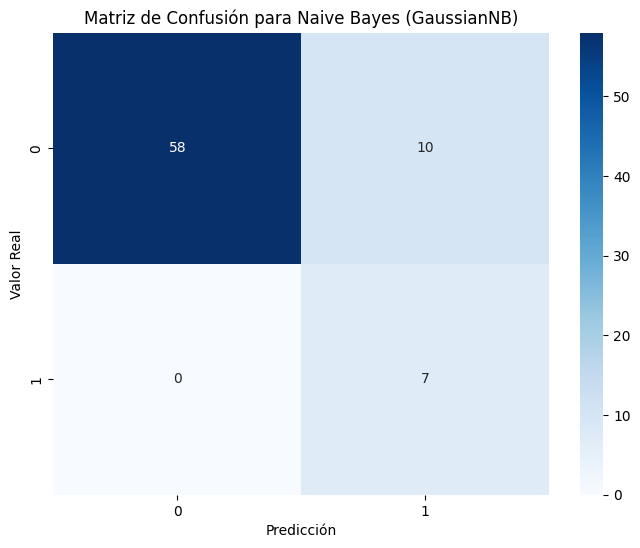

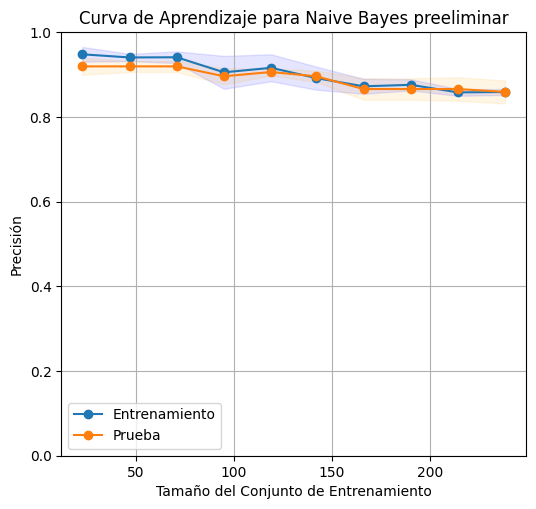

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 2300%
Puntuación de Precisión (Entrenamiento): 0.9478
Puntuación de Precisión (Prueba): 0.9193
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 4700%
Puntuación de Precisión (Entrenamiento): 0.9404
Puntuación de Precisión (Prueba): 0.9194
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 7100%
Puntuación de Precisión (Entrenamiento): 0.9408
Puntuación de Precisión (Prueba): 0.9194
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 9500%
Puntuación de Precisión (Entrenamiento): 0.9053
Puntuación de Precisión (Prueba): 0.8960
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 11900%
Puntuación de Precisión (Entrenamiento): 0.9160
Puntuación de Precisión (Prueba): 0.9060
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 14200%
Puntuación de Precisión (Entrenamiento): 0.8915
Puntuación de 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear y entrenar el modelo Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = naive_bayes.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Naive Bayes: {accuracy:.4f}")

# Asegúrate de convertir las clases a strings
target_names = [str(label) for label in naive_bayes.classes_]

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=target_names)
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=naive_bayes.classes_),
                             index=naive_bayes.classes_,
                             columns=naive_bayes.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(naive_bayes.classes_)):
    auc_roc_scores[naive_bayes.classes_[i]] = roc_auc_score(y_test == naive_bayes.classes_[i], y_pred == naive_bayes.classes_[i])

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Calcular y graficar la matriz de confusión (opcional)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=naive_bayes.classes_, yticklabels=naive_bayes.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Naive Bayes (GaussianNB)')
plt.show()

# Calcular la curva de aprendizaje para Naive Bayes
train_sizes, train_scores, test_scores = learning_curve(
    naive_bayes, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular la media y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 5.5))
plt.plot(train_sizes, train_scores_mean, label='Entrenamiento', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Prueba', marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.title('Curva de Aprendizaje para Naive Bayes preeliminar')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylim(0, 1)  # Ajustar el rango del eje
plt.ylabel('Precisión')
plt.legend(loc='best')
plt.grid()  
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)

##### Ajustado

Precisión del modelo Naive Bayes después del ajuste: 0.8800

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        68
           1       0.43      0.86      0.57         7

    accuracy                           0.88        75
   macro avg       0.71      0.87      0.75        75
weighted avg       0.93      0.88      0.90        75


Matriz de Confusión en texto:
    0  1
0  60  8
1   1  6

Área bajo la Curva ROC (AUC-ROC) para cada clase:
0: 0.8697
1: 0.8697


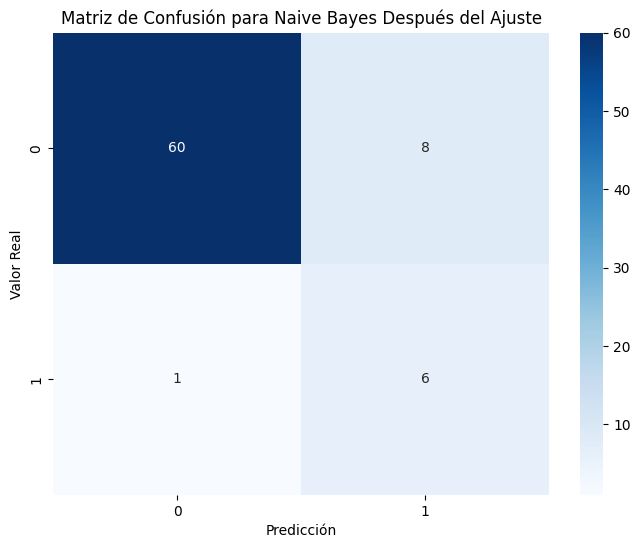

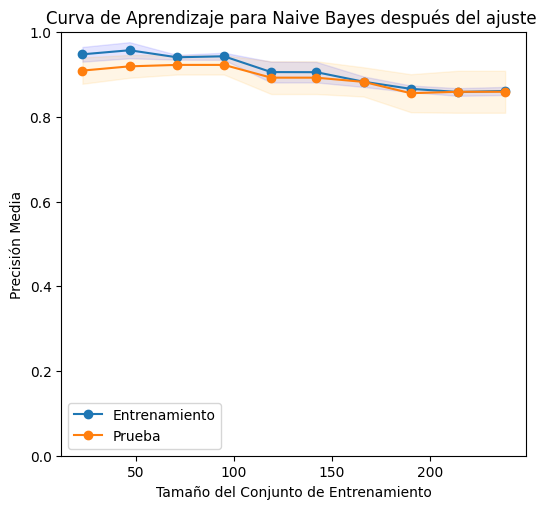

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 2300%
Puntuación de Precisión (Entrenamiento): 0.9478
Puntuación de Precisión (Prueba): 0.9094
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 4700%
Puntuación de Precisión (Entrenamiento): 0.9574
Puntuación de Precisión (Prueba): 0.9194
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 7100%
Puntuación de Precisión (Entrenamiento): 0.9408
Puntuación de Precisión (Prueba): 0.9228
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 9500%
Puntuación de Precisión (Entrenamiento): 0.9432
Puntuación de Precisión (Prueba): 0.9228
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 11900%
Puntuación de Precisión (Entrenamiento): 0.9059
Puntuación de Precisión (Prueba): 0.8927
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 14200%
Puntuación de Precisión (Entrenamiento): 0.9056
Puntuación de 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV
import seaborn as sns

# Realizar SMOTE para balancear las clases 
smote = SMOTE(sampling_strategy=0.6,random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Definir el modelo Naive Bayes
naive_bayes = GaussianNB(priors=[0.1, 0.9])

# Definir los hiperparámetros a ajustar
param_grid = {
    'var_smoothing': [ 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

# Configurar la estrategia de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(naive_bayes, param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train_bal, y_train_bal)

# Obtener el mejor modelo después del ajuste
best_naive_bayes = grid_search.best_estimator_

# Calibrar el modelo utilizando CalibratedClassifierCV
calibrated_naive_bayes = CalibratedClassifierCV(best_naive_bayes, method='sigmoid', cv=cv)
calibrated_naive_bayes.fit(X_train_bal, y_train_bal)

# Realizar predicciones en el conjunto de prueba
y_pred = best_naive_bayes.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Naive Bayes después del ajuste: {accuracy:.4f}")

# Asegúrate de convertir las clases a strings
target_names = [str(label) for label in best_naive_bayes.classes_]

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=target_names)
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=best_naive_bayes.classes_),
                             index=best_naive_bayes.classes_,
                             columns=best_naive_bayes.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)



# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(best_naive_bayes.classes_)):
    auc_roc_scores[best_naive_bayes.classes_[i]] = roc_auc_score(y_test == best_naive_bayes.classes_[i], y_pred == best_naive_bayes.classes_[i])



# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Calcular la curva de aprendizaje para Naive Bayes
train_sizes, train_scores, test_scores = learning_curve(
    best_naive_bayes, X_train, y_train, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))


# Calcular y graficar la matriz de confusión (opcional)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_naive_bayes.classes_, yticklabels=best_naive_bayes.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Naive Bayes Después del Ajuste')
plt.show()

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje con intervalos de confianza
plt.figure(figsize=(6, 5.5))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Entrenamiento')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Prueba')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Precisión Media')
plt.title('Curva de Aprendizaje para Naive Bayes después del ajuste ')
plt.ylim(0, 1)  # Ajustar el rango del eje y
plt.legend()
plt.show()


# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)

#### MODELO: LogisticRegression




##### Preliminar

Vamos a prescindir de algunas variables dummies para evitar Multicolinealidad perfecta

In [ ]:
df_for_LR = df_encoded[[
    'Llamadas_Efectivas_com', 
    'WA_Seguimiento_com',
    'Llamadas_Efectivas_exp', 
    'Llamadas_No_Efectivas_exp',
    'Capacitaciones_Hechas', 
    'Capacitaciones_Canceladas', 
    'R1yR2',
    '(C) (EXP) Plazo y Pago_Anual',
    '(C) (EXP) Plazo y Pago_Mensual', 
    'Tipo de cliente_B', 
    'Tipo de cliente_C',
    'Churn Comercial']]

In [13]:
# Separar features y target
X_1 = df_for_LR.drop(columns=['Churn Comercial'])  
y_1 = df_for_LR['Churn Comercial'] 

In [16]:
# Dividir datos en train y test 
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.20, random_state=42, stratify=y_1)

Precisión del modelo de Regresión Logística: 0.8800

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        68
           1       0.00      0.00      0.00         7

    accuracy                           0.88        75
   macro avg       0.45      0.49      0.47        75
weighted avg       0.82      0.88      0.85        75


Matriz de Confusión en texto:
    0  1
0  66  2
1   7  0

Área bajo la Curva ROC (AUC-ROC) para cada clase:
0: 0.4853
1: 0.4853


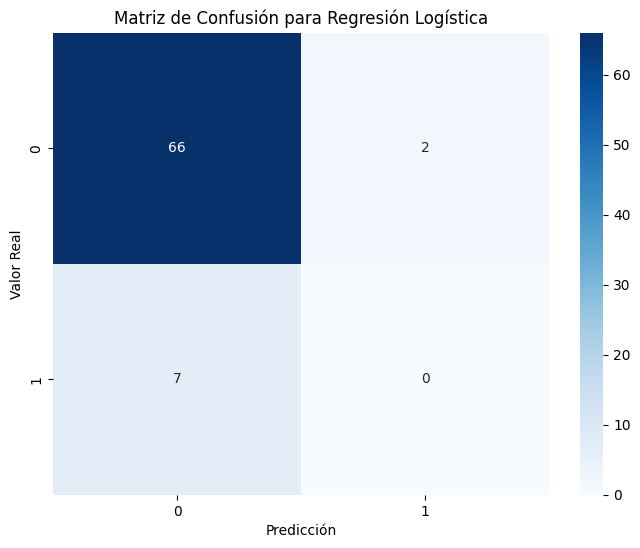

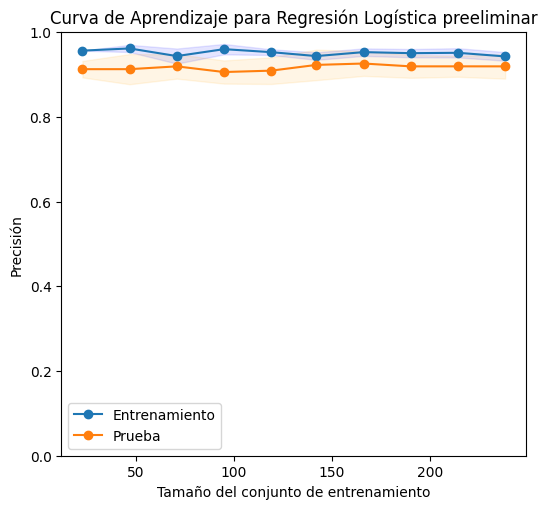

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 2300%
Puntuación de Precisión (Entrenamiento): 0.9565
Puntuación de Precisión (Prueba): 0.9128
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 4700%
Puntuación de Precisión (Entrenamiento): 0.9617
Puntuación de Precisión (Prueba): 0.9128
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 7100%
Puntuación de Precisión (Entrenamiento): 0.9437
Puntuación de Precisión (Prueba): 0.9194
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 9500%
Puntuación de Precisión (Entrenamiento): 0.9600
Puntuación de Precisión (Prueba): 0.9060
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 11900%
Puntuación de Precisión (Entrenamiento): 0.9529
Puntuación de Precisión (Prueba): 0.9093
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 14200%
Puntuación de Precisión (Entrenamiento): 0.9437
Puntuación de 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, KFold
import seaborn as sns
import pandas as pd
import numpy as np

# Crear y entrenar el modelo de Regresión Logística
logistic_regression = LogisticRegression()
logistic_regression.fit(X_1_train, y_1_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_regression.predict(X_1_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_1_test, y_pred)
print(f"Precisión del modelo de Regresión Logística: {accuracy:.4f}")

# Asegúrate de convertir las clases a strings
#target_names = [str(label) for label in logistic_regression.classes_]

# Calcular el informe de clasificación
report = classification_report(y_1_test, y_pred, 
                               target_names=[str(label) for label in logistic_regression.classes_])
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_1_test, y_pred, labels=logistic_regression.classes_),
                             index=logistic_regression.classes_,
                             columns=logistic_regression.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(logistic_regression.classes_)):
    auc_roc_scores[logistic_regression.classes_[i]] = roc_auc_score(y_1_test == logistic_regression.classes_[i], y_pred == logistic_regression.classes_[i])

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Calcular y graficar la matriz de confusión (opcional)
cm = confusion_matrix(y_1_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=logistic_regression.classes_, yticklabels=logistic_regression.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Regresión Logística')
plt.show()

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    logistic_regression, X_1_train, y_1_train, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular la media y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 5.5))
plt.plot(train_sizes, train_scores_mean, label='Entrenamiento', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')

plt.plot(train_sizes, test_scores_mean, label='Prueba', marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje para Regresión Logística preeliminar')
plt.ylim(0, 1)  # Ajustar el rango del eje
plt.legend()
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)


##### Ajustado

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_

Precisión del modelo de Regresión Logística después del ajuste y validación cruzada: 0.9200

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        68
           1       0.60      0.43      0.50         7

    accuracy                           0.92        75
   macro avg       0.77      0.70      0.73        75
weighted avg       0.91      0.92      0.91        75


Matriz de Confusión en texto:
    0  1
0  66  2
1   4  3

Área bajo la Curva ROC (AUC-ROC) para cada clase:
0: 0.6996
1: 0.6996


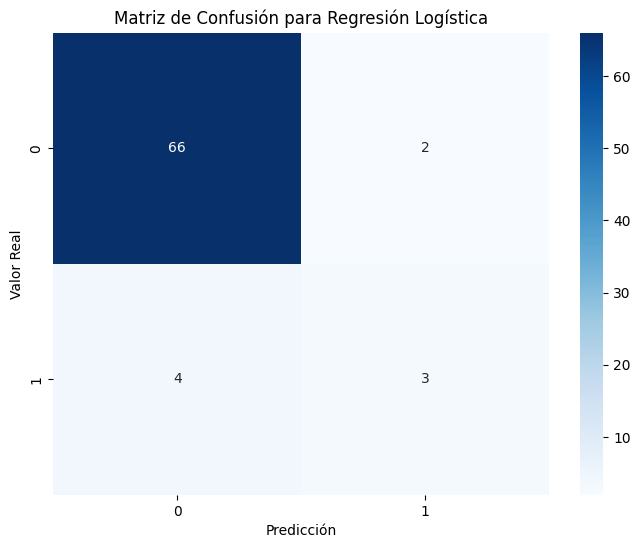

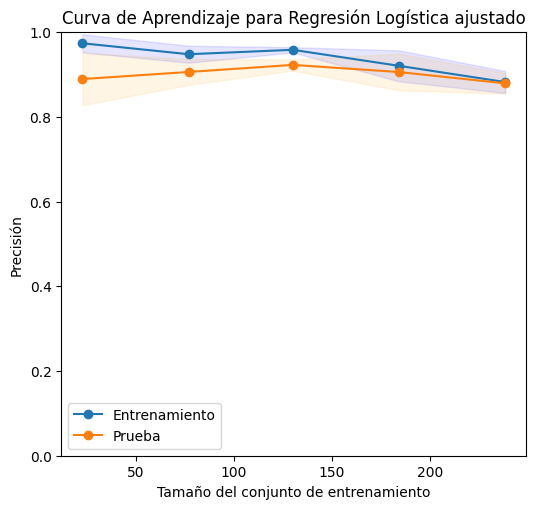

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 2300%
Puntuación de Precisión (Entrenamiento): 0.9739
Puntuación de Precisión (Prueba): 0.8894
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 7700%
Puntuación de Precisión (Entrenamiento): 0.9481
Puntuación de Precisión (Prueba): 0.9062
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 13000%
Puntuación de Precisión (Entrenamiento): 0.9585
Puntuación de Precisión (Prueba): 0.9228
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 18400%
Puntuación de Precisión (Entrenamiento): 0.9207
Puntuación de Precisión (Prueba): 0.9060
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 23800%
Puntuación de Precisión (Entrenamiento): 0.8824
Puntuación de Precisión (Prueba): 0.8793
----------------------------------------


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Balanceo con SMOTE
smote = SMOTE(sampling_strategy=0.9,random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_1_train, y_1_train)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_1_test)

# Definir el modelo de Regresión Logística con clase balanceada
logistic_regression = LogisticRegression(max_iter=700, 
                                         class_weight = {0: 1, 1: 20}, 
                                         random_state=42)

# Definir los hiperparámetros a ajustar
param_grid = {
    'C': [ 0.01, 0.1, 1, 10, 100, 1000, 10000],  # Explorar más valores de C
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga'],  # Probar más solvers
}

# Configurar la estrategia de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(logistic_regression, param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train_scaled, y_train_bal)

# Obtener el mejor modelo después del ajuste
best_logistic_regression = grid_search.best_estimator_

# Calibrar el modelo utilizando CalibratedClassifierCV
calibrated_logistic = CalibratedClassifierCV(best_logistic_regression, method='sigmoid', cv=cv)
calibrated_logistic.fit(X_train_scaled, y_train_bal)

# Realizar predicciones en el conjunto de prueba
y_pred = best_logistic_regression.predict(X_1_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_1_test, y_pred)
print(f"Precisión del modelo de Regresión Logística después del ajuste y validación cruzada: {accuracy:.4f}")

# Calcular el informe de clasificación
report = classification_report(y_1_test, y_pred, target_names=[str(label) for label in best_logistic_regression.classes_])
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_1_test, y_pred, labels=best_logistic_regression.classes_),
                             index=best_logistic_regression.classes_,
                             columns=best_logistic_regression.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(best_logistic_regression.classes_)):
    auc_roc_scores[best_logistic_regression.classes_[i]] = roc_auc_score(y_1_test == best_logistic_regression.classes_[i], y_pred == best_logistic_regression.classes_[i])

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Calcular y graficar la matriz de confusión (opcional)
cm = confusion_matrix(y_1_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_logistic_regression.classes_, yticklabels=best_logistic_regression.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Regresión Logística')
plt.show()

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_logistic_regression, X_1_train, y_1_train, cv=cv, scoring='accuracy', n_jobs=-1)

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 5.5))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-',  label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-',  label="Prueba")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.ylim(0, 1)  # Ajustar el rango del eje y
plt.title("Curva de Aprendizaje para Regresión Logística ajustado")
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)

#### MODELO: Decision Tree

##### Preliminar

Precisión del modelo DecisionTreeClassifier: 0.9200

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        68
           1       0.57      0.57      0.57         7

    accuracy                           0.92        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.92      0.92      0.92        75


Matriz de Confusión en texto:
    0  1
0  65  3
1   3  4

Área bajo la Curva ROC (AUC-ROC) para cada clase:
0: 0.7637
1: 0.7637


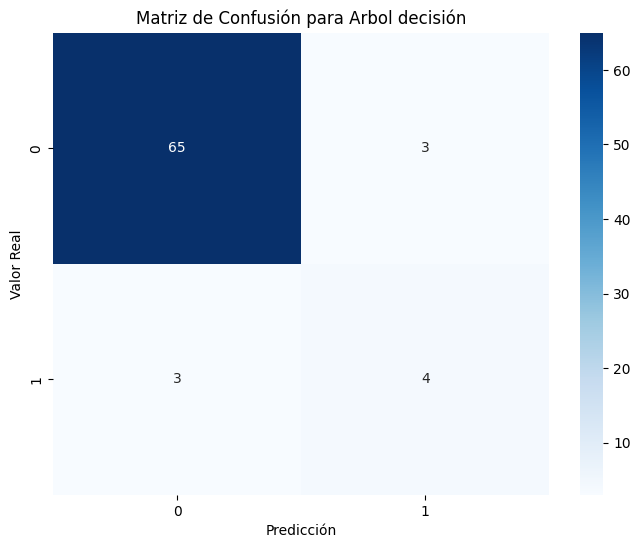

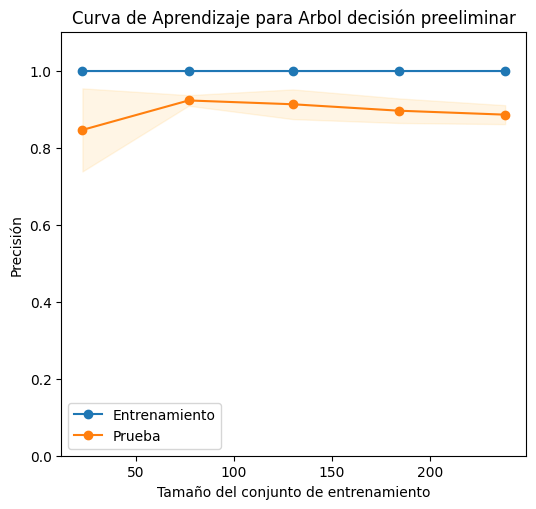

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 2300%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.8462
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 7700%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.9228
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 13000%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.9129
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 18400%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.8962
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 23800%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.8859
----------------------------------------


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Crear y ajustar el modelo DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = decision_tree.predict(X_test)

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo DecisionTreeClassifier: {accuracy:.4f}")

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=[str(label) for label in decision_tree.classes_])
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=decision_tree.classes_),
                             index=decision_tree.classes_,
                             columns=decision_tree.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(decision_tree.classes_)):
    auc_roc_scores[decision_tree.classes_[i]] = roc_auc_score(y_test == decision_tree.classes_[i], y_pred == decision_tree.classes_[i])

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Mostrar la matriz de confusión como un gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues", xticklabels=decision_tree.classes_, yticklabels=decision_tree.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Arbol decisión')

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(decision_tree, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6,5.5))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-', label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Prueba")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.ylim(0, 1.1)  # Ajustar el rango del eje y
plt.title("Curva de Aprendizaje para Arbol decisión preeliminar")
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)

##### Ajustado

Precisión del modelo Arbol decisión después del ajuste: 0.9333

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        68
           1       0.60      0.86      0.71         7

    accuracy                           0.93        75
   macro avg       0.79      0.90      0.83        75
weighted avg       0.95      0.93      0.94        75


Matriz de Confusión en texto:
    0  1
0  64  4
1   1  6

Área bajo la Curva ROC (AUC-ROC) para cada clase:
0: 0.8992
1: 0.8992


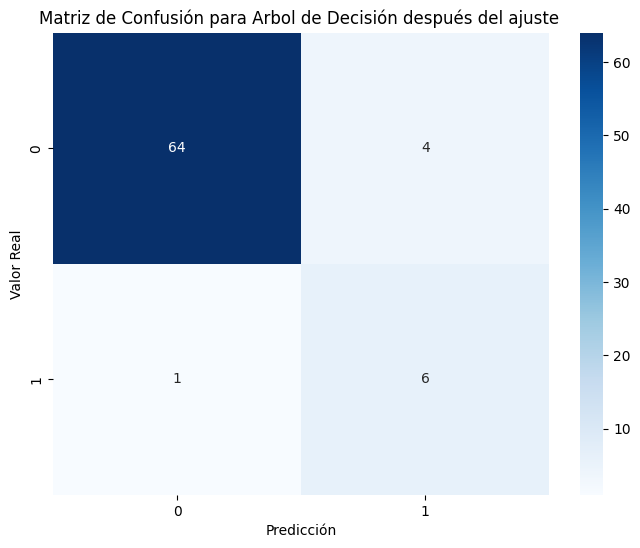

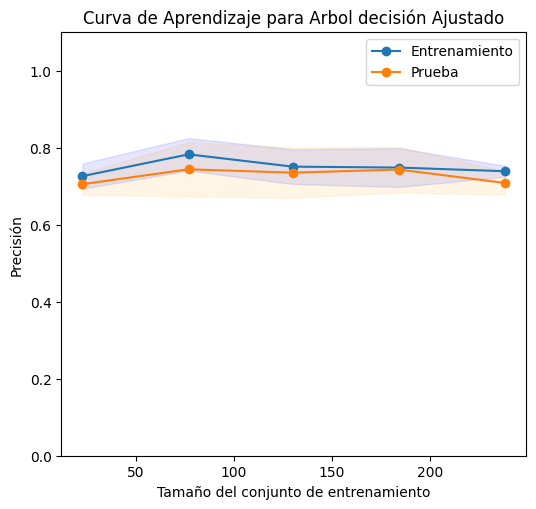

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 2300%
Puntuación de Precisión (Entrenamiento): 0.7262
Puntuación de Precisión (Prueba): 0.7054
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 7700%
Puntuación de Precisión (Entrenamiento): 0.7828
Puntuación de Precisión (Prueba): 0.7439
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 13000%
Puntuación de Precisión (Entrenamiento): 0.7509
Puntuación de Precisión (Prueba): 0.7353
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 18400%
Puntuación de Precisión (Entrenamiento): 0.7485
Puntuación de Precisión (Prueba): 0.7432
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 23800%
Puntuación de Precisión (Entrenamiento): 0.7389
Puntuación de Precisión (Prueba): 0.7085
----------------------------------------


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

# Balanceo con SMOTE
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Modelo base de DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
)

# Definición de hiperparámetros
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'max_depth': [None] + list(range(5, 20)),  
    'min_samples_split': list(range(3, 50, 5)),  
    'min_samples_leaf': list(range(1, 20)),  # Permitir hojas más pequeñas
    'min_impurity_decrease': [0.0] + [i / 1000.0 for i in range(1, 51)],  # Más regularización
    'class_weight': [None, 'balanced', {0: 1, 1: 10}, {0: 1, 1: 20}],  # Ajustar el peso de las clases
    'max_features': ['sqrt', 'log2', None],  # Variar el número de características
    'splitter': ['best', 'random']  # Probar ambos tipos de división
}

# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(
    decision_tree, 
    param_distributions=param_dist, 
    cv=cv, 
    n_iter=30, 
    random_state=42
)
random_search.fit(X_train_bal, y_train_bal)

# Mejor modelo
best_decision_tree = random_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_decision_tree.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Arbol decisión después del ajuste: {accuracy:.4f}")

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=[str(label) for label in best_decision_tree.classes_])
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=best_decision_tree.classes_),
                             index=best_decision_tree.classes_,
                             columns=best_decision_tree.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(best_decision_tree.classes_)):
    auc_roc_scores[best_decision_tree.classes_[i]] = roc_auc_score(y_test == best_decision_tree.classes_[i], y_pred == best_decision_tree.classes_[i])

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Mostrar la matriz de confusión como un gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues", xticklabels=best_decision_tree.classes_, yticklabels=best_decision_tree.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Arbol de Decisión después del ajuste ')

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_decision_tree, X_train, y_train, cv=cv, scoring='precision_macro', n_jobs=-1)

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 5.5))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-',  label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-',  label="Prueba")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.ylim(0, 1.1)  # Ajustar el rango del eje y
plt.title("Curva de Aprendizaje para Arbol decisión Ajustado")
plt.show()


# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)


#### MODELO: Random Forest

##### Preliminar

Precisión del modelo Bosque aleatorio: 0.9200

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        68
           1       0.60      0.43      0.50         7

    accuracy                           0.92        75
   macro avg       0.77      0.70      0.73        75
weighted avg       0.91      0.92      0.91        75


Matriz de Confusión en texto:
    0  1
0  66  2
1   4  3

Área bajo la Curva ROC (AUC-ROC) para cada clase:
0: 0.6996
1: 0.6996


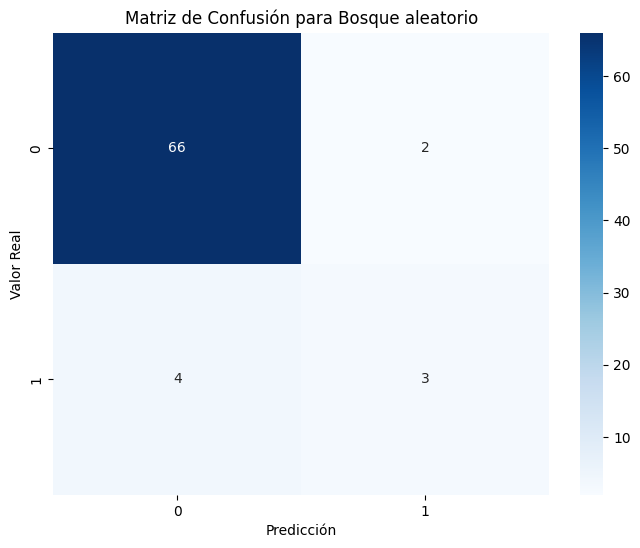

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

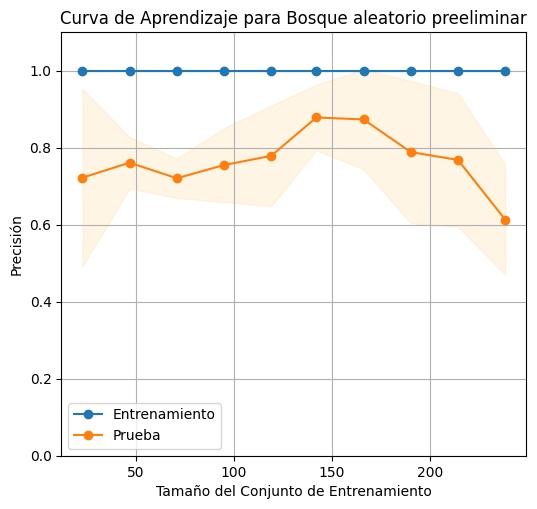

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 2300%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.7223
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 4700%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.7611
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 7100%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.7207
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 9500%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.7550
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 11900%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.7789
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 14200%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import learning_curve
import numpy as np

# Crear y entrenar el modelo RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Evaluar el rendimiento del modelo RandomForestClassifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Bosque aleatorio: {accuracy:.4f}")

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=[str(label) for label in random_forest.classes_])
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=random_forest.classes_),
                             index=random_forest.classes_,
                             columns=random_forest.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {class_label: roc_auc_score(y_test == class_label, y_pred == class_label)
                  for class_label in random_forest.classes_}

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Calcular y graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=random_forest.classes_, yticklabels=random_forest.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Bosque aleatorio')
plt.show()

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    random_forest, X_train, y_train, cv=5, scoring='precision_macro', train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular la media y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 5.5))
plt.plot(train_sizes, train_scores_mean, label='Entrenamiento', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Prueba', marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.title('Curva de Aprendizaje para Bosque aleatorio preeliminar')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='best')
plt.ylim(0, 1.1)  # Ajustar el rango del eje y
plt.grid()
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)

##### Ajustado

Precisión del modelo Bosque Aleatorio (calibrado): 0.9200

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        68
           1       0.55      0.86      0.67         7

    accuracy                           0.92        75
   macro avg       0.76      0.89      0.81        75
weighted avg       0.94      0.92      0.93        75


Matriz de Confusión:
    0  1
0  63  5
1   1  6

Área bajo la Curva ROC (AUC-ROC):
0: 0.8918
1: 0.8918


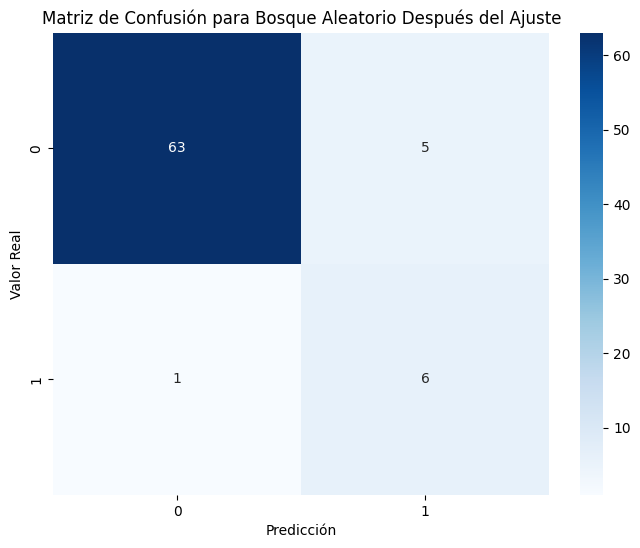

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL\AppData\Loca

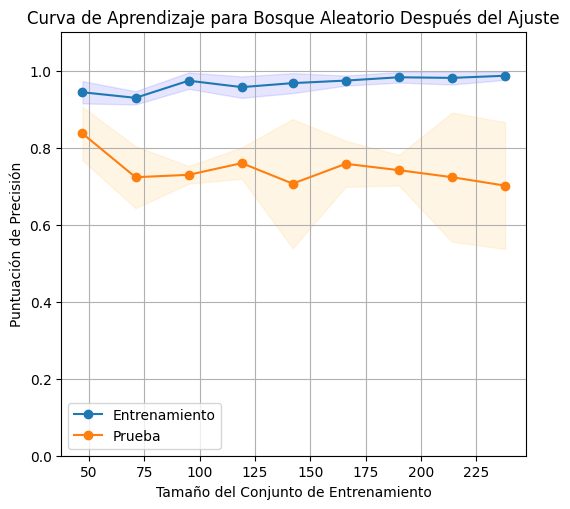

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 2300%
Puntuación de Precisión (Entrenamiento): nan
Puntuación de Precisión (Prueba): nan
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 4700%
Puntuación de Precisión (Entrenamiento): 0.9440
Puntuación de Precisión (Prueba): 0.8370
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 7100%
Puntuación de Precisión (Entrenamiento): 0.9296
Puntuación de Precisión (Prueba): 0.7234
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 9500%
Puntuación de Precisión (Entrenamiento): 0.9741
Puntuación de Precisión (Prueba): 0.7296
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 11900%
Puntuación de Precisión (Entrenamiento): 0.9574
Puntuación de Precisión (Prueba): 0.7600
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 14200%
Puntuación de Precisión (Entrenamiento): 0.9678
Puntuación de Precis

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Balanceo con SMOTE 
smote = SMOTE(random_state=42, sampling_strategy=1)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Definir el modelo RandomForestClassifier con hiperparámetros ajustados
random_forest = RandomForestClassifier(
    random_state=42,
    max_depth=5, 
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight={0: 1, 1: 20}  
)

# Parámetros para RandomizedSearchCV
param_dist = {
    'n_estimators': [50,100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Configuración de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist,
    n_iter=100,
    scoring='accuracy',
    cv=cv,
    random_state=42,
    n_jobs=1
)
random_search.fit(X_train_bal, y_train_bal)

# Obtener el mejor modelo después del ajuste
best_rf = random_search.best_estimator_

# Calibrar el modelo utilizando CalibratedClassifierCV
calibrated_rf = CalibratedClassifierCV(best_rf, method='sigmoid', cv=cv)
calibrated_rf.fit(X_train_bal, y_train_bal)

# Realizar predicciones con el modelo calibrado
y_pred = calibrated_rf.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Bosque Aleatorio (calibrado): {accuracy:.4f}")

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=[str(label) for label in calibrated_rf.classes_])
print("\nInforme de Clasificación:")
print(report)

# Calcular la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=calibrated_rf.classes_),
                             index=calibrated_rf.classes_,
                             columns=calibrated_rf.classes_)
print("\nMatriz de Confusión:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for class_label in calibrated_rf.classes_:
    auc_roc_scores[class_label] = roc_auc_score(y_test == class_label, y_pred == class_label)

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC):")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Obtener probabilidades del modelo calibrado
y_pred_prob = calibrated_rf.predict_proba(X_test)[:, 1]

# Ajustar el umbral de decisión (ejemplo: 0.6 en lugar de 0.5)
threshold = 0.6
y_pred = (y_pred_prob >= threshold).astype(int)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues", 
            xticklabels=calibrated_rf.classes_, yticklabels=calibrated_rf.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para Bosque Aleatorio Después del Ajuste')
plt.show()

# Curva de aprendizaje con el modelo calibrado
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(
    calibrated_rf, X_train, y_train, cv=cv, scoring='precision_macro', train_sizes=train_sizes)

# Calcular medias y desviaciones estándar
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 5.5))
plt.plot(train_sizes, train_scores_mean, label='Entrenamiento', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Prueba', marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.title('Curva de Aprendizaje para Bosque Aleatorio Después del Ajuste')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Puntuación de Precisión')
plt.ylim(0, 1.1)
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)


#### MODELO: XGBoost

##### Preliminar

Precisión del modelo de XGBoost: 0.8800

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.33      0.29      0.31         7

    accuracy                           0.88        75
   macro avg       0.63      0.61      0.62        75
weighted avg       0.87      0.88      0.88        75


Matriz de Confusión en texto:
    0  1
0  64  4
1   5  2

Área bajo la Curva ROC (AUC-ROC) para cada clase:
0: 0.6134
1: 0.6134


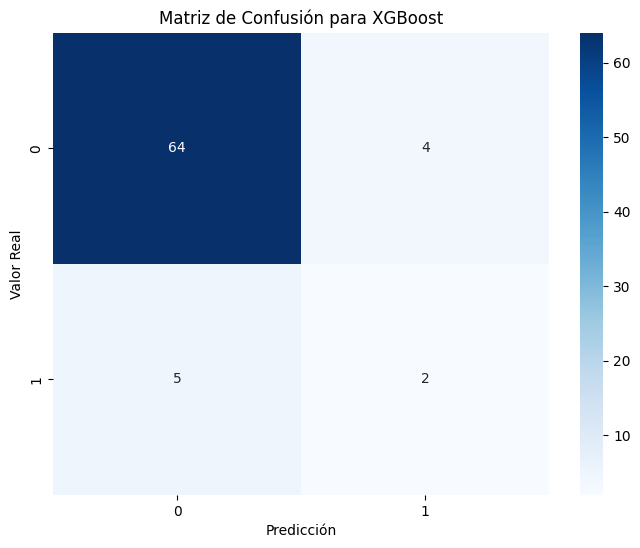

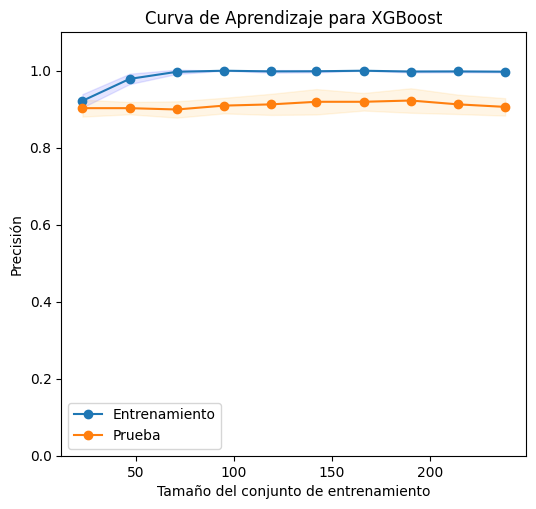

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 2300%
Puntuación de Precisión (Entrenamiento): 0.9217
Puntuación de Precisión (Prueba): 0.9028
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 4700%
Puntuación de Precisión (Entrenamiento): 0.9787
Puntuación de Precisión (Prueba): 0.9028
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 7100%
Puntuación de Precisión (Entrenamiento): 0.9972
Puntuación de Precisión (Prueba): 0.8993
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 9500%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.9094
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 11900%
Puntuación de Precisión (Entrenamiento): 0.9983
Puntuación de Precisión (Prueba): 0.9126
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 14200%
Puntuación de Precisión (Entrenamiento): 0.9986
Puntuación de 

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Crear y entrenar el modelo de XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = xgb.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo de XGBoost: {accuracy:.4f}")

# Convertir las clases en cadenas de texto
target_names = [str(cls) for cls in xgb.classes_]

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=target_names)
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=xgb.classes_),
                             index=xgb.classes_,
                             columns=xgb.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(xgb.classes_)):
    auc_roc_scores[xgb.classes_[i]] = roc_auc_score(y_test == xgb.classes_[i], y_pred == xgb.classes_[i])

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Calcular y graficar la matriz de confusión (opcional)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=xgb.classes_, yticklabels=xgb.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para XGBoost')
plt.show()

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    xgb, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular la media y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 5.5))
plt.plot(train_sizes, train_scores_mean, label='Entrenamiento', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')

plt.plot(train_sizes, test_scores_mean, label='Prueba', marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje para XGBoost')
plt.ylim(0, 1.1)  # Ajustar el rango del eje
plt.legend()
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)


##### Ajustado

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Precisión del modelo de XGBoost ajustado con SMOTE: 0.9200

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        68
           1       0.54      1.00      0.70         7

    accuracy                           0.92        75
   macro avg       0.77      0.96      0.83        75
weighted avg       0.96      0.92      0.93        75


Matriz de Confusión en texto:
    0  1
0  62  6
1   0  7

Área bajo la Curva ROC (AUC-ROC) para cada clase:
0: 0.9559
1: 0.9559


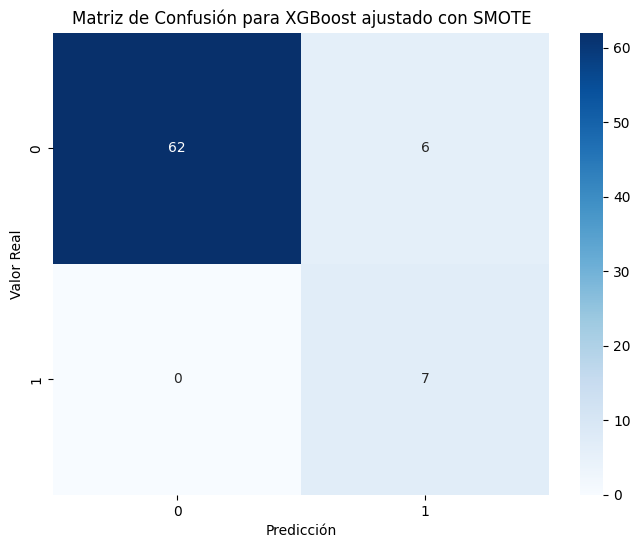

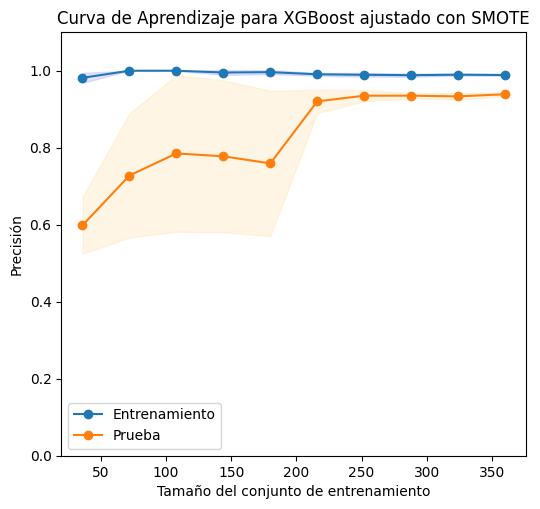

Curva de Aprendizaje:
Tamaño del Conjunto de Entrenamiento: 3600%
Puntuación de Precisión (Entrenamiento): 0.9815
Puntuación de Precisión (Prueba): 0.5981
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 7200%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.7278
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 10800%
Puntuación de Precisión (Entrenamiento): 1.0000
Puntuación de Precisión (Prueba): 0.7852
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 14400%
Puntuación de Precisión (Entrenamiento): 0.9954
Puntuación de Precisión (Prueba): 0.7778
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 18000%
Puntuación de Precisión (Entrenamiento): 0.9963
Puntuación de Precisión (Prueba): 0.7593
----------------------------------------
Tamaño del Conjunto de Entrenamiento: 21600%
Puntuación de Precisión (Entrenamiento): 0.9907
Puntuación d

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Aplicar SMOTE para equilibrar las clases en el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Crear el modelo de XGBoost con parámetros ajustados
xgboost_model = XGBClassifier(
    scale_pos_weight=6,  # Ajustar el peso de las clases desbalanceadas
    objective='binary:logistic',
    eval_metric='logloss',
    n_jobs=1  # Usar múltiples CPUs para acelerar el entrenamiento
)

# Definir los valores para la búsqueda aleatoria
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],  
    'n_estimators': [50, 100, 150],  
    'max_depth': [4, 5, 6],  
    'subsample': [0.7, 0.8, 0.9], 
    'colsample_bytree': [0.7, 0.8],  
    'gamma': [0, 0.1], 
    'reg_alpha': [0, 0.1],  
    'reg_lambda': [1, 1.1]  
}

# Definir StratifiedKFold para la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la búsqueda aleatoria para optimizar los hiperparámetros
random_search = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=param_dist,
    n_iter=100,
    cv=cv,  
    verbose=1,
    n_jobs=1,
    scoring='accuracy',
    random_state=42
)

# Entrenar el modelo con la búsqueda aleatoria
random_search.fit(X_train_bal, y_train_bal)

# Obtener el mejor modelo
best_xgb = random_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_xgb.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo de XGBoost ajustado con SMOTE: {accuracy:.4f}")

# Convertir las clases en cadenas de texto
target_names = [str(cls) for cls in best_xgb.classes_]

# Calcular el informe de clasificación
report = classification_report(y_test, y_pred, target_names=target_names)
print("\nInforme de Clasificación:")
print(report)

# Calcular y mostrar la matriz de confusión en texto
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=best_xgb.classes_),
                             index=best_xgb.classes_,
                             columns=best_xgb.classes_)
print("\nMatriz de Confusión en texto:")
print(confusion_df)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = {}
for i in range(len(best_xgb.classes_)):
    auc_roc_scores[best_xgb.classes_[i]] = roc_auc_score(y_test == best_xgb.classes_[i], y_pred == best_xgb.classes_[i])

# Imprimir el AUC-ROC para cada clase
print("\nÁrea bajo la Curva ROC (AUC-ROC) para cada clase:")
for class_label, auc_roc in auc_roc_scores.items():
    print(f"{class_label}: {auc_roc:.4f}")

# Calcular y graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_xgb.classes_, yticklabels=best_xgb.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión para XGBoost ajustado con SMOTE')
plt.show()

# Calcular la curva de aprendizaje
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_xgb, X_train_bal, y_train_bal, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular la media y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 5.5))
plt.plot(train_sizes, train_scores_mean, label='Entrenamiento', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')

plt.plot(train_sizes, test_scores_mean, label='Prueba', marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje para XGBoost ajustado con SMOTE')
plt.ylim(0, 1.1)  # Ajustar el rango del eje
plt.legend()
plt.show()

# Imprimir la curva de aprendizaje en texto
print("Curva de Aprendizaje:")
for size, train_score, test_score in zip(train_sizes, train_scores, test_scores):
    print(f"Tamaño del Conjunto de Entrenamiento: {size * 100:.0f}%")
    print(f"Puntuación de Precisión (Entrenamiento): {np.mean(train_score):.4f}")
    print(f"Puntuación de Precisión (Prueba): {np.mean(test_score):.4f}")
    print("-" * 40)

In [ ]:
# Obtener la importancia de las características
importancias = best_xgb.feature_importances_

# Crear un DataFrame con las variables y su importancia
df_importancia = pd.DataFrame({'Variable': X_train.columns, 'Importancia': importancias})

# Ordenar de mayor a menor importancia
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# Mostrar la importancia de las variables
print(df_importancia)

                          Variable  Importancia
8   (C) (EXP) Plazo y Pago_Mensual     0.506052
7     (C) (EXP) Plazo y Pago_Anual     0.418233
4            Capacitaciones_Hechas     0.020052
5        Capacitaciones_Canceladas     0.010440
1               WA_Seguimiento_com     0.006954
12               Tipo de cliente_C     0.006800
2           Llamadas_Efectivas_exp     0.006357
3        Llamadas_No_Efectivas_exp     0.006040
6                            R1yR2     0.005158
0           Llamadas_Efectivas_com     0.004963
11               Tipo de cliente_B     0.004590
10               Tipo de cliente_A     0.004362
9     (C) (EXP) Plazo y Pago_Otros     0.000000
